In [ ]:
# Dataset

!wget https://cb.lk/covid_19

--2021-06-07 18:26:45--  https://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 172.67.187.81, 104.21.72.203, 2606:4700:3031::6815:48cb, ...
Connecting to cb.lk (cb.lk)|172.67.187.81|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2021-06-07 18:26:46--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2021-06-07 18:26:46--  https://www.dropbox.com/s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: ht

In [ ]:
!ls

covid_19  sample_data


In [ ]:
!unzip covid_19

Archive:  covid_19
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-bbb6-ffe7

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

### Let's Make a CNN Model

In [ ]:
model = Sequential()
model.add( Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(224,224,3)))
model.add( Conv2D(64, (3, 3), activation='relu'))
model.add( MaxPool2D(pool_size=(2,2)))
model.add( Dropout(0.25))

model.add( Conv2D(64, (3, 3), activation='relu'))
model.add( MaxPool2D(pool_size=(2,2)))
model.add( Dropout(0.25))

model.add( Conv2D(128, (3, 3), activation='relu'))
model.add( MaxPool2D(pool_size=(2,2)))
model.add( Dropout(0.25))

model.add(Flatten())
model.add( Dense(64, activation='relu'))
model.add( Dropout(0.5))
model.add( Dense(1, activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 54, 54, 64)       

In [ ]:
train_datagen = image.ImageDataGenerator(
    rescale=1.0 / 255.0,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = image.ImageDataGenerator(rescale = 1.0 / 255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'binary')

Found 224 images belonging to 2 classes.


In [ ]:
val_generator = test_datagen.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 60 images belonging to 2 classes.


In [ ]:
print(train_generator.class_indices)
print(val_generator.class_indices)

{'Covid': 0, 'Normal': 1}
{'Covid': 0, 'Normal': 1}


In [ ]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch = 7,
    epochs = 10,
    validation_data = val_generator,
    validation_steps = 2
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
7/7 [==============================] - 9s 1s/step - loss: 0.6549 - accuracy: 0.6071 - val_loss: 0.6326 - val_accuracy: 0.9000
Epoch 2/10
7/7 [==============================] - 8s 1s/step - loss: 0.4976 - accuracy: 0.7812 - val_loss: 0.3531 - val_accuracy: 0.9333
Epoch 3/10
7/7 [==============================] - 8s 1s/step - loss: 0.3500 - accuracy: 0.8661 - val_loss: 0.1830 - val_accuracy: 0.9667
Epoch 4/10
7/7 [==============================] - 8s 1s/step - loss: 0.2127 - accuracy: 0.9375 - val_loss: 0.1658 - val_accuracy: 0.9500
Epoch 5/10
7/7 [==============================] - 8s 1s/step - loss: 0.4297 - accuracy: 0.8482 - val_loss: 0.2056 - val_accuracy: 0.9333
Epoch 6/10
7/7 [==============================] - 8s 1s/step - loss: 0.3612 - accuracy: 0.8839 - val_loss: 0.3177 - val_accuracy: 0.9667
Epoch 7/10
7/7 [==============================] - 8s 1s/step - loss: 0.3150 - accuracy: 0.8839 - val_loss: 0.3090 - val_accuracy: 0.9667
Epoch 8/10
7/7 [=========================

In [ ]:
model.save("model_adv.h5")

In [ ]:
model.evaluate_generator(train_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.16120783984661102, 0.9642857313156128]

In [ ]:
model.evaluate_generator(val_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.11812039464712143, 0.9833333492279053]

In [ ]:
model = load_model("model_adv.h5")

In [ ]:
import os

In [ ]:
y_actual = []
y_test = []

In [ ]:
for i in os.listdir('CovidDataset/Val/Normal/'):
  img = image.load_img('CovidDataset/Val/Normal/'+i, target_size=(224,224))
  img = image.img_to_array(img) / 255.0
  img = np.expand_dims(img, axis=0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
for i in os.listdir('CovidDataset/Val/Covid/'):
  img = image.load_img('CovidDataset/Val/Covid/'+i, target_size=(224,224))
  img = image.img_to_array(img) / 255.0
  img = np.expand_dims(img, axis=0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [ ]:
print(y_actual.shape)

(60,)


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_actual, y_test)

In [ ]:
import seaborn as sns

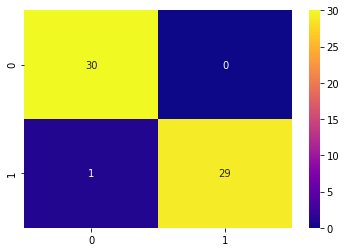

In [ ]:
sns.heatmap(cm, cmap='plasma', annot=True)
plt.show()